# <center>Scaler Case Study</center>

# Introduction
- Scaler, as an emerging tech-versity, endeavors to provide world-class education 
in computer science & data science domains
- A significant challenge for Scaler is understanding the diverse backgrounds of its 
learners, especially in terms of their current roles, companies, and experience 
Clustering similar learners helps in customizing the learning experience, there y
increasing retention and satisfact.
- Analyzing the vast data of learners can uncover patterns in their professional 
backgrounds and preferences. This allows Scaler to make tailored conten 
recommendations and provide specialized mentorshi
- By leveraging data science and unsupervised learning, particularly clustering 
techniques, Scaler can group learners with similar profiles, aiding in delivering  
more personalized learning journe

# What is Expected?
Assuming you're a data scientist at Scaler, you're tasked with the responsibility of 
analyzing the dataset to profile the best companies and job positions from Scaler' 
database. Your primary goal is to execute clustering techniques, evaluate t e
coherence of your clusters, and provide actionable insights for enhanced lear er
profiling and course tailoring.y.p.on.er churn.

# 1. Data
The analysis was done on the data located at - https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv


# 2. Libraries
Below are the libraries required

In [1]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

from random import sample
from numpy.random import uniform

import re

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram

import umap

# 3. Data Loading
Loading the data into Pandas dataframe for easily handling of data

In [2]:
# read the file into a pandas dataframe
df = pd.read_csv('scaler_clustering.csv')
# look at the datatypes of the columns
print('*************************************************')
print(df.info())
print('*************************************************\n')
print('*************************************************')
print(f'Shape of the dataset is {df.shape}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of nan/null values in each column: \n{df.isna().sum()}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of unique values in each column: \n{df.nunique()}')
print('*************************************************\n')
print('*************************************************')
print(f'Duplicate entries: \n{df.duplicated().value_counts()}')

*************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB
None
*************************************************

*************************************************
Shape of the dataset is (205843, 7)
*************************************************

*************************************************
Number of nan/null values in each column: 
Unnamed: 0              0
company_hash           44
email_h

In [3]:
# look at the top 20 rows
df.head(5)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [4]:
df.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [5]:
df.describe(include='object')

,company_hash,email_hash,job_position
count,205799,205843,153279
unique,37299,153443,1016
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


### Insight
- There are **205843** entries with 7 columns
- There are 44 null/missing values in *company_hash*, 86 in *orgyear* and 52564 in *job_position*
- There are no **duplicates**
- There are **1016** unique **job_position**
- The column **Unnamed: 0** can be dropped as it doesnt provide any new information

In [6]:
# Drop "Unnamed: 0" column
df.drop(columns=['Unnamed: 0'], inplace=True)

def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string

# Normalize the string
df["company_hash"] = df["company_hash"].apply(lambda x: preprocess_string(str(x)))
df["job_position"] = df["job_position"].apply(lambda x: preprocess_string(str(x)))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205843 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      205843 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [7]:
# look at the top 5 rows
df.head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,2018.0,700000,fullstack engineer,2020.0
6,lubgqsvz wyvot wg,9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c4128...,2018.0,1500000,fullstack engineer,2019.0
7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,400000,backend engineer,2019.0
8,utqoxontzn ojontbo,e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...,2020.0,450000,nan,2019.0
9,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019.0,360000,nan,2019.0


# 4. Exploratory Data Analysis

## 4.1. Univariate analysis

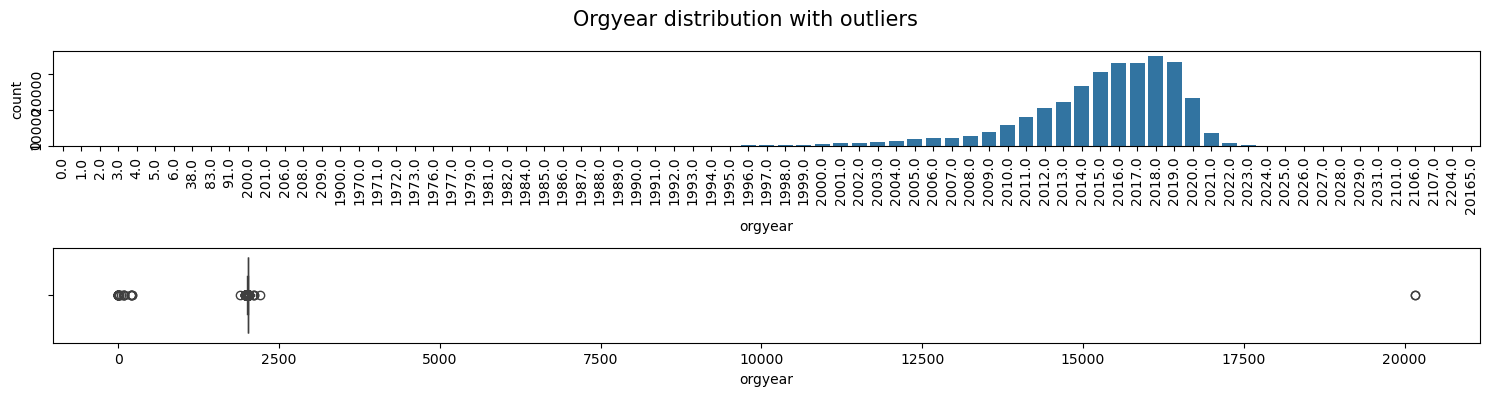

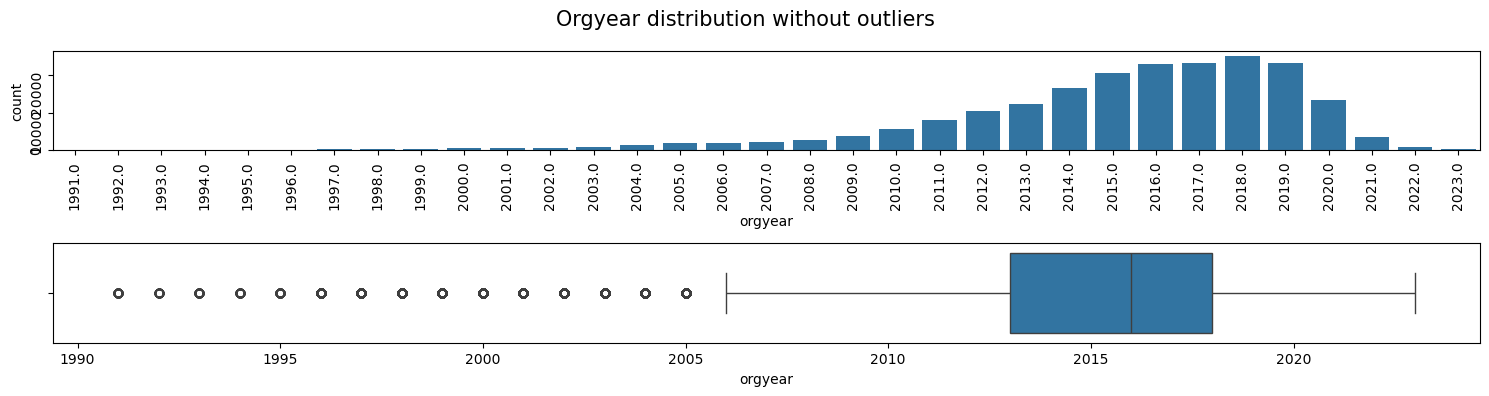

In [8]:
data = df['orgyear']
fig, axs = plt.subplots(2,1,figsize=(15,4))
sns.countplot(ax = axs[0], x=data)
axs[0].tick_params(labelrotation=90)
sns.boxplot(ax = axs[1], x=data)
fig.suptitle('Orgyear distribution with outliers', fontsize=15)
plt.tight_layout()
plt.show()

lower_bound = df['orgyear'].quantile(0.001)
upper_bound = df['orgyear'].quantile(0.999)
data = data[(data >= lower_bound) & (data <= upper_bound)]
fig, axs = plt.subplots(2,1,figsize=(15,4))
sns.countplot(ax = axs[0], x=data)
axs[0].tick_params(labelrotation=90)
sns.boxplot(ax = axs[1], x=data)
fig.suptitle('Orgyear distribution without outliers', fontsize=15)
plt.tight_layout()
plt.show()

### Insight
- The column **orgyear** has a lot of errors. The years close to 0 and the years greater than the current year are all outliers
- Maximum number of learners began their employment at the current company in the year 2018
- The distribution is left skewed, which is obvious as there are learners who have been working from long time too

In [9]:
df = df[(df['orgyear'] >= lower_bound) & (df['orgyear'] <= upper_bound)]
df.reset_index(drop=True, inplace=True)

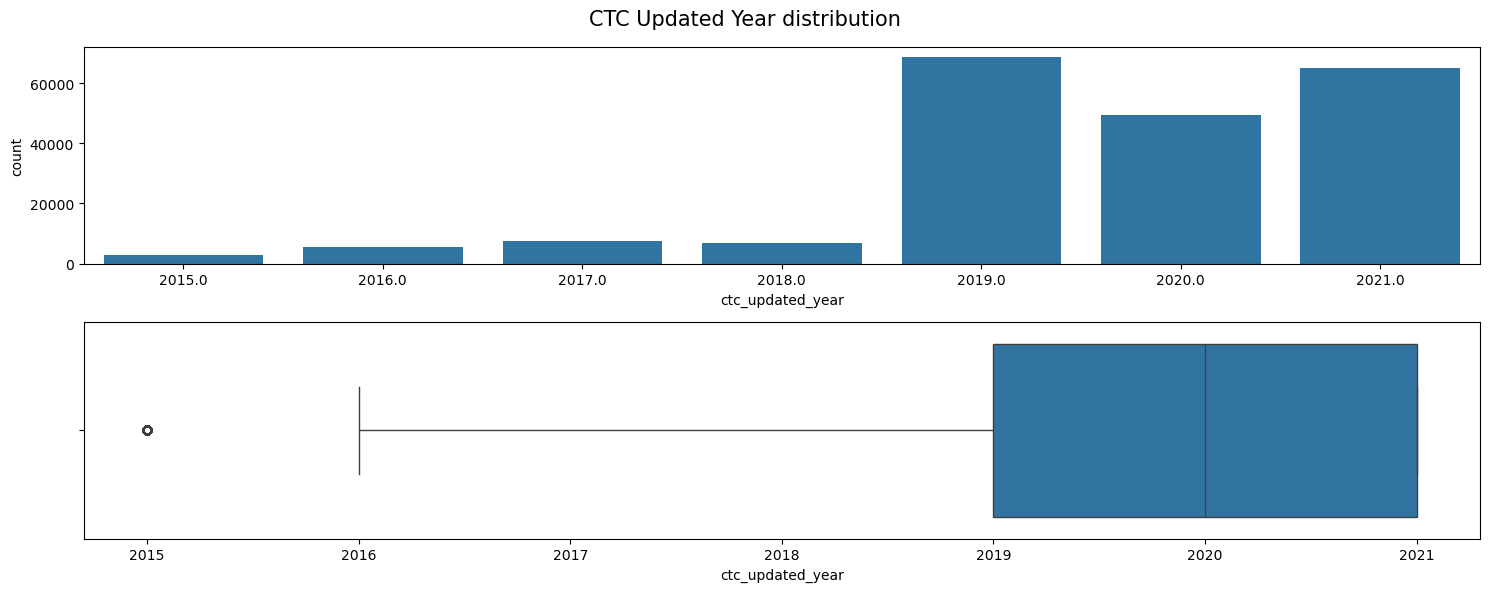

In [10]:
data = df['ctc_updated_year']
fig, axs = plt.subplots(2,1,figsize=(15,6))
sns.countplot(ax = axs[0], x=data)
sns.boxplot(ax = axs[1], x=data)
fig.suptitle('CTC Updated Year distribution', fontsize=15)
plt.tight_layout()
plt.show()

### Insight
- Maximum learners got their **CTC updated** in the year **2019, 2020 and 2021**

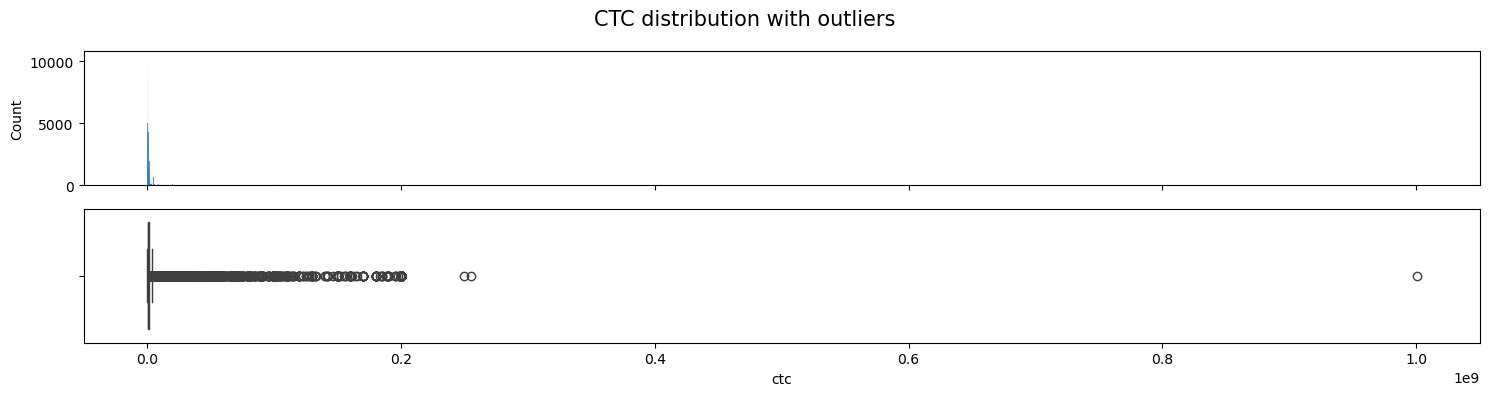

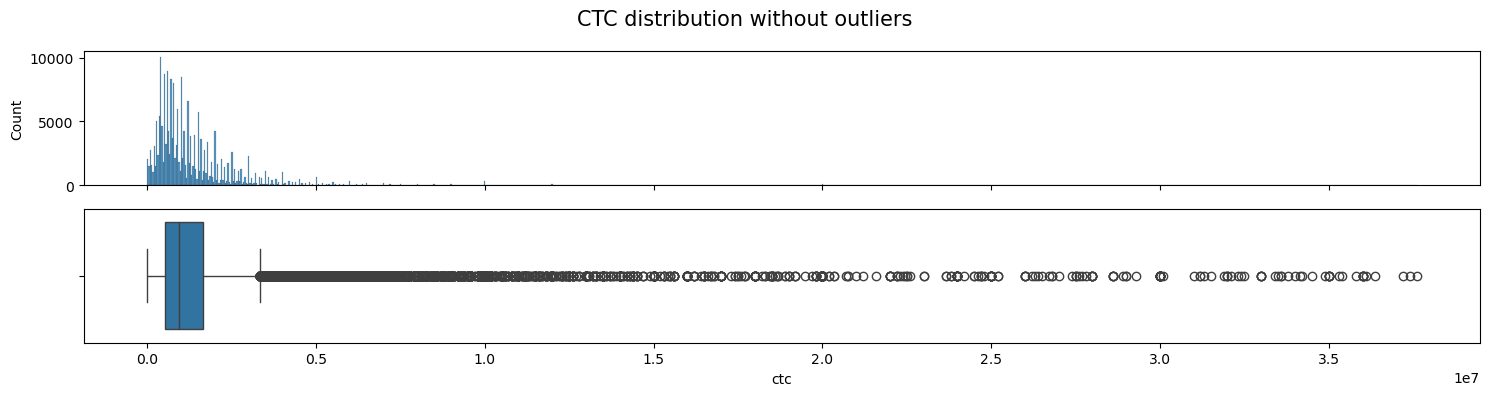

In [11]:
data = df['ctc']
fig, axs = plt.subplots(2,1,figsize=(15,4), sharex=True)
sns.histplot(ax = axs[0], x=data)
sns.boxplot(ax = axs[1], x=data)
fig.suptitle('CTC distribution with outliers', fontsize=15)
plt.tight_layout()
plt.show()

mean = data.mean()
std = data.std()
lower_bound = mean - (3*std)
upper_bound = mean + (3*std)
data = data[(data > lower_bound) & (data < upper_bound)]
fig, axs = plt.subplots(2,1,figsize=(15,4), sharex=True)
sns.histplot(ax = axs[0], x=data)
sns.boxplot(ax = axs[1], x=data)
fig.suptitle('CTC distribution without outliers', fontsize=15)
plt.tight_layout()
plt.show()

### Insight
- The distribution of CTC is extremely right skewed with an obvious outlier being at CTC around 1.0E9
- Without the outlier also, the CTC is right skewed as there are good number of learners with higher CTC

In [12]:
df = df[(df['ctc'] >= lower_bound) & (df['ctc'] <= upper_bound)]
df.reset_index(drop=True, inplace=True)

In [13]:
df['company_hash'].value_counts()[:10]

company_hash
nvnv wgzohrnvzwj otqcxwto    8266
xzegojo                      5348
vbvkgz                       3446
zgn vuurxwvmrt vwwghzn       3356
wgszxkvzn                    3212
vwwtznhqt                    2833
fxuqg rxbxnta                2622
gqvwrt                       2496
bxwqgogen                    2121
wvustbxzx                    2026
Name: count, dtype: int64

### Insight
- Maximum number of learners have their **current employer** whose company hash is **nvnv wgzohrnvzwj otqcxwto**

In [14]:
df['email_hash'].value_counts()[:10]

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c     8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551     8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0     8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
Name: count, dtype: int64

### Insight
- It is suprising to see that many learners have the same email id, with maximum(10) learners having **email** with hash **bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b**

In [15]:
df['job_position'].value_counts()

job_position
nan                   52166
backend engineer      43336
fullstack engineer    25826
other                 17628
frontend engineer     10341
                      ...  
traineeintern             1
staff consultant          1
java devloper             1
associate l               1
azure data factory        1
Name: count, Length: 848, dtype: int64

### Insight
- Maximum number of learners are Backend Engineers

## 4.2. Bivariate analysis

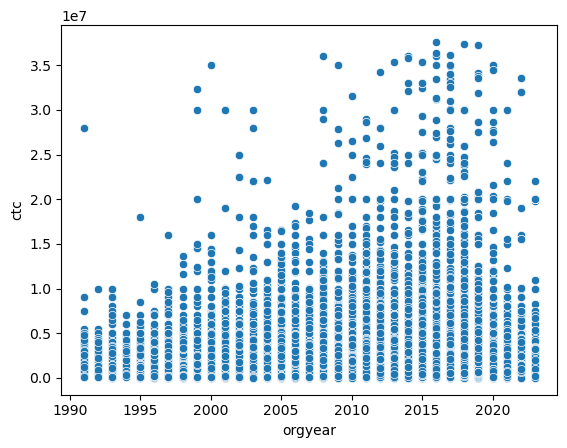

In [16]:
sns.scatterplot(data=df, x='orgyear', y='ctc')
plt.show()

### Insight
- It is obvious that the learners who joined/changed company recently have a higher CTC

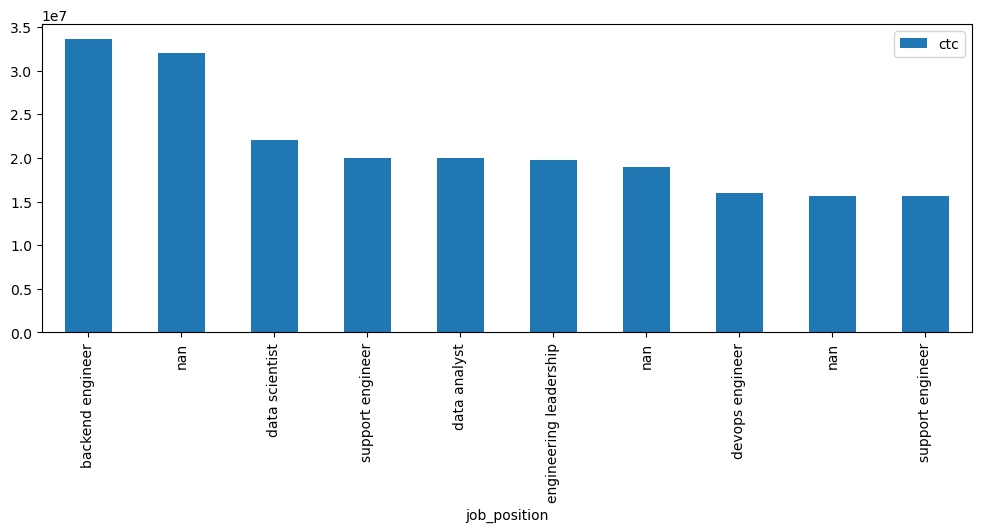

In [17]:
df[(df['job_position'] != 'other') & 
(~df['job_position'].isna()) & 
(df['orgyear'] > 2021)][['ctc', 'job_position']].sort_values(by='ctc', ascending=False).head(10).plot(kind='bar', x = 'job_position', y='ctc', figsize=(12,4))
plt.show()

### Insight
- Above plot shows few of the positions with top CTCs
- It has a mix of software developers, data analysts/scients, leadership etc

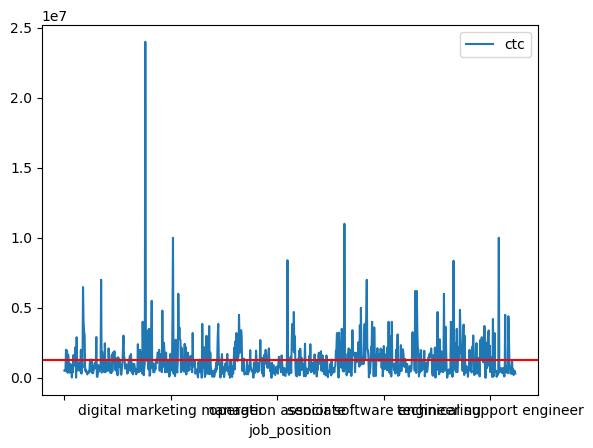

Insight: Average CTC across different job positions is 1268701.92


In [18]:
temp_df = df.groupby(['job_position']).agg({'ctc':'mean'})
temp_df.plot(kind='line')
ctc_mean = round(temp_df['ctc'].mean(),2)
plt.axhline(y = ctc_mean, color = 'r', linestyle = '-')
plt.show()
print(f'Insight: Average CTC across different job positions is {ctc_mean}')

## 4.3. Multivariate analysis

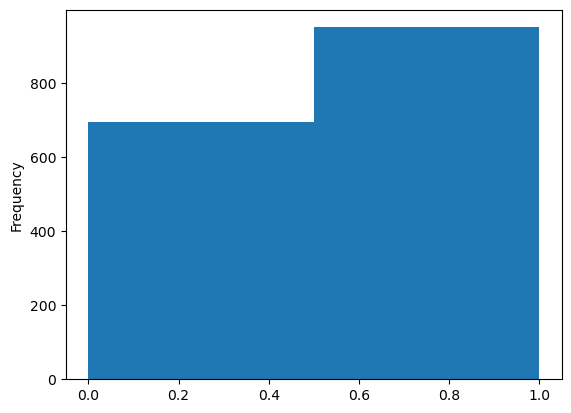

In [19]:
temp_df = df[~df['job_position'].isna()]
temp_df = temp_df.groupby(['company_hash', 'job_position']).agg({'ctc':'mean'}).reset_index()
temp_df_da = temp_df[[True if ('data' and 'scientist' in x) else False for x in temp_df['job_position']]]
temp_df_da = temp_df_da.drop(columns=['job_position']).rename(columns={'ctc':'ctc_ds'}).reset_index(drop=True)
temp_df_others = temp_df[[True if ('data' and 'scientist' not in x) else False for x in temp_df['job_position']]]
temp_df_others = temp_df_others.drop(columns=['job_position']).rename(columns={'ctc':'ctc_others'}).reset_index(drop=True)
temp_df_common = temp_df_da.merge(temp_df_others, on = 'company_hash', how='inner')
temp_df_common['ctc_ds_gt_ctc_others'] = temp_df_common['ctc_ds'] > temp_df_common['ctc_others']
temp_df_common.groupby(['company_hash']).agg({'ctc_ds_gt_ctc_others':'mean'}).reset_index()['ctc_ds_gt_ctc_others'].plot(kind='hist', bins=2)
plt.show()

### Insight
- There are around 900+ companies in which more than 50% of the times the avergae CTC of a Data Scientist is greater than that of other roles

# 5. Data Preprocessing

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203956 entries, 0 to 203955
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      203956 non-null  object 
 1   email_hash        203956 non-null  object 
 2   orgyear           203956 non-null  float64
 3   ctc               203956 non-null  int64  
 4   job_position      203956 non-null  object 
 5   ctc_updated_year  203956 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.3+ MB


## 5.1. Handling duplicate values

In [21]:
df[df['email_hash'] == 'bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
23498,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,nan,2020.0
45062,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,support engineer,2020.0
71181,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,other,2020.0
101498,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,fullstack engineer,2020.0
116226,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,data analyst,2020.0
119910,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,other,2019.0
122888,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,support engineer,2019.0
142804,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,fullstack engineer,2019.0
151096,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,devops engineer,2019.0
158105,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,nan,2019.0


There should be a unique entry for a combination of employee's e-mail and CTC. I will remove all the duplicates by keeping only the first entry as the first entry seems to be the latest entry

In [22]:
df = df.drop_duplicates(subset=['email_hash', 'ctc'])
df.reset_index(drop=True, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162004 entries, 0 to 162003
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      162004 non-null  object 
 1   email_hash        162004 non-null  object 
 2   orgyear           162004 non-null  float64
 3   ctc               162004 non-null  int64  
 4   job_position      162004 non-null  object 
 5   ctc_updated_year  162004 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.4+ MB


In [24]:
df['email_hash'].value_counts()[:10]

email_hash
58ae1bae06ebf94f022cc06962029090b67e1e0a19c9b367426a0478ed349a41    2
f33f83536090140ab11955aea0c1940d24e52944e22d6b1ac83c07f77da04b45    2
ffa1726ba8fbf5c3824d00f6d311384f3b6873a82ba4c299392e956a0af14f88    2
02ba5874e4bdd9952a6b1a518d15628946cb7c1d72861adbd4f513b8da1fd52f    2
bb318b24ecb7b28951bc201e00cceb3b4de49c47539b4e70cff4d66b7d0e3951    2
85b377da8855513ddc45b010a6eaf02bd1581605d4533a1d8bbe9025aedf005c    2
79a18f18303458d0a393607f951ed8088a696e540812350fb98686c558c6bd73    2
9ce698befbf7aa7fc6fc468e8c7d98c3e069b9f5c176eec471f6d2b3e621fe28    2
7f334761242f8e2bd159707e166fbf0a380700a9fbef62e70c09f4a9e878690c    2
902b1c1a83fbffd623ae728394e826ca6b72c6b2a8e3b1f5bee13761dcca1cf5    2
Name: count, dtype: int64

In [25]:
df[df['email_hash'] == 'bd126a265ff5985a859b2226e38d99eaa786771b2f3e0564adccef4772964497']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
77199,vbvkgz,bd126a265ff5985a859b2226e38d99eaa786771b2f3e05...,2018.0,320000,nan,2020.0
78210,vbvkgz,bd126a265ff5985a859b2226e38d99eaa786771b2f3e05...,2018.0,235999,other,2019.0


## 5.2. Handling null values

In [26]:
df.isna().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [27]:
print(f'Number of empty company hash is {(df["company_hash"] == "").sum()}')
print(f'Number of company hash with "nan" values is {(df["company_hash"] == "nan").sum()}')
print(f'Number of empty job position is {(df["job_position"] == "").sum()}')
print(f'Number of job position with "nan" values is {(df["job_position"] == "nan").sum()}')

Number of empty company hash is 64
Number of company hash with "nan" values is 37
Number of empty job position is 6
Number of job position with "nan" values is 35841


### Insight
- I will remove records where company hash is empty or "nan"
- I will remove records where job position is empty
- I will use imputation for job position with "nan" values

In [28]:
df = df[~((df["company_hash"] == "") | (df["company_hash"] == "nan") | (df["job_position"] == ""))]
df.reset_index(drop=True, inplace=True)

print(f'Number of empty company hash is {(df["company_hash"] == "").sum()}')
print(f'Number of company hash with "nan" values is {(df["company_hash"] == "nan").sum()}')
print(f'Number of empty job position is {(df["job_position"] == "").sum()}')
print(f'Number of job position with "nan" values is {(df["job_position"] == "nan").sum()}')

df.loc[df['job_position']=='nan', 'job_position']=np.nan
df.isna().sum()

Number of empty company hash is 0
Number of company hash with "nan" values is 0
Number of empty job position is 0
Number of job position with "nan" values is 35787


company_hash            0
email_hash              0
orgyear                 0
ctc                     0
job_position        35787
ctc_updated_year        0
dtype: int64

In [29]:
temp_df = df[['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year']].copy()
encoders = dict()
columns_to_encode = ['company_hash', 'job_position']
for col in columns_to_encode:
    series = temp_df[col]
    encoder = LabelEncoder()
    temp_df[col] = pd.Series(encoder.fit_transform(series[series.notnull()]),
                         index = series[series.notnull()].index)
    encoders[col] = encoder    
    
imputer = KNNImputer(n_neighbors=1)
temp_df = pd.DataFrame(imputer.fit_transform(temp_df), columns=temp_df.columns)
temp_df['job_position'] = encoders['job_position'].inverse_transform(temp_df['job_position'].astype('int32'))

In [30]:
df['job_position'] = temp_df['job_position']

print(f'Number of empty company hash is {(df["company_hash"] == "").sum()}')
print(f'Number of company hash with "nan" values is {(df["company_hash"] == "nan").sum()}')
print(f'Number of empty job position is {(df["job_position"] == "").sum()}')
print(f'Number of job position with "nan" values is {(df["job_position"] == "nan").sum()}')

df.isna().sum()

Number of empty company hash is 0
Number of company hash with "nan" values is 0
Number of empty job position is 0
Number of job position with "nan" values is 0


company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

## 5.3. Outlier Treatment

Outlier have already been taken care of

## 5.4. Feature Engineering

**Handle entries having ctc_updated_year less than orgyear**

In [31]:
value = (df['orgyear'] > df['ctc_updated_year']).sum()
print(f'Before -> Number of entries where ctc_updated_year is less than orgyear: {value}')
df['ctc_updated_year'] = df[["ctc_updated_year","orgyear"]].max(axis = 1)
value = (df['orgyear'] > df['ctc_updated_year']).sum()
print(f'After -> Number of entries where ctc_updated_year is less than orgyear: {value}')

Before -> Number of entries where ctc_updated_year is less than orgyear: 7331
After -> Number of entries where ctc_updated_year is less than orgyear: 0


**Extract years of experience and years since increment values**

In [32]:
current_year = 2023
df['years_of_experience'] = current_year - df['orgyear']
df['years_since_increment'] = current_year - df['ctc_updated_year']

**Calculate CTC rank by comparing the CTC seperately against average CTC per company, average CTC per job position and average CTC per years of experience**\
Value 1 - CTC is greater than all three average CTCs\
Value 2 - CTC is greater than at least 2 of the average CTCs\
Value 3 - CTC is greater than at least 1 of average CTCs\
Va;ue 4 - CTC is less than all the three average CTCs

In [33]:
df1 = df.groupby(['company_hash']).agg({'ctc':'mean'}).reset_index().rename(columns = {'ctc':'avg_ctc_per_C'})
df2 = df.groupby(['job_position']).agg({'ctc':'mean'}).reset_index().rename(columns = {'ctc':'avg_ctc_per_J'})
df3 = df.groupby(['years_of_experience']).agg({'ctc':'mean'}).reset_index().rename(columns = {'ctc':'avg_ctc_per_E'})
df = df.merge(df1, on='company_hash', how='left')
df = df.merge(df2, on='job_position', how='left')
df = df.merge(df3, on='years_of_experience', how='left')
def calculate_ctc_rnk(ctc, acpc, acpj, acpe):
    if ctc > acpc and ctc > acpj and ctc > acpe:
        return 1
    elif (ctc > acpc and ctc > acpj) or (ctc > acpc and ctc > acpe) or (ctc > acpj and ctc > acpe):
        return 2
    elif ctc > acpc or ctc > acpj or ctc > acpe:
        return 3
    else:
        return 4
df['ctc_rnk'] = df.apply(lambda x: calculate_ctc_rnk(x['ctc'],
                                                         x['avg_ctc_per_C'], 
                                                         x['avg_ctc_per_J'], 
                                                         x['avg_ctc_per_E']), 
                           axis=1)
df.drop(columns=['avg_ctc_per_C', 'avg_ctc_per_J', 'avg_ctc_per_E'], inplace=True)

In [34]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,years_since_increment,ctc_rnk
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,7.0,3.0,3
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,5.0,4.0,4
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0,3.0,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,6.0,4.0,4
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,6.0,4.0,1


**Calculate designation, class and tier values based on CTC statistics on company-experience level, company-position level and company level**\
Value 1 - CTC is greater than 75% of the population of the group\
Value 2 - CTC is between 50% and 75% of the population of the group\
Value 2 - CTC is less than 50% of the population of the group

In [35]:
def group_ctc(x,x50,x75):
    if x < x50:
        return 3
    elif x >= x50 and x <= x75:
        return 2
    elif  x > x75:
        return 1

In [36]:
temp_df_CE = df.groupby(['company_hash', 'years_of_experience'])['ctc'].describe()
df_CE = df.merge(temp_df_CE, on=['company_hash', 'years_of_experience'], how='left')
temp_df_CJ = df.groupby(['company_hash', 'job_position'])['ctc'].describe()
df_CJ = df.merge(temp_df_CJ, on=['company_hash', 'job_position'], how='left')
temp_df_C = df.groupby(['company_hash'])['ctc'].describe()
df_C = df.merge(temp_df_C, on=['company_hash'], how='left')

In [37]:
df['designation'] = df_CE.apply(lambda x: group_ctc(x['ctc'], x["50%"], x["75%"]), axis=1)
df['class'] = df_CJ.apply(lambda x: group_ctc(x['ctc'], x["50%"], x["75%"]), axis=1)
df['tier'] = df_C.apply(lambda x: group_ctc(x['ctc'], x["50%"], x["75%"]), axis=1)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,years_since_increment,ctc_rnk,designation,class,tier
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,7.0,3.0,3,2,1,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,5.0,4.0,4,3,3,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0,3.0,2,2,2,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,6.0,4.0,4,3,3,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,6.0,4.0,1,2,1,1


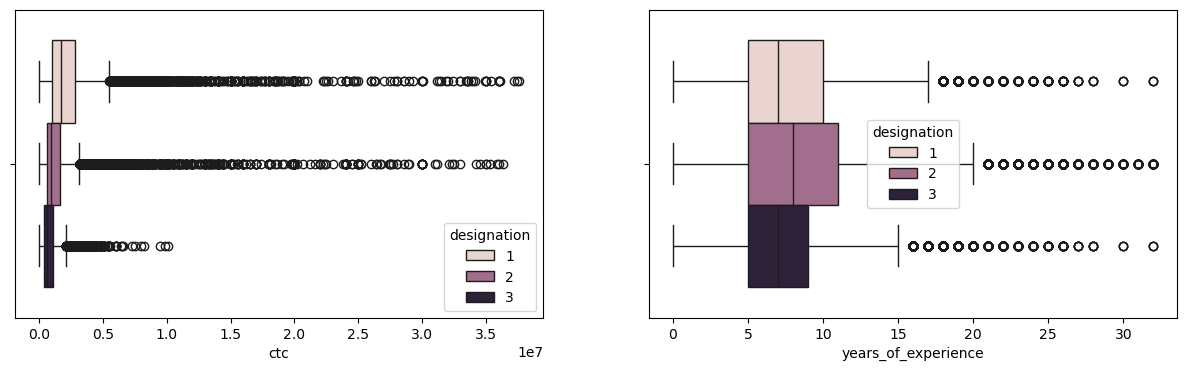

    designation        job_position  count
0             1    backend engineer  10657
1             1  fullstack engineer   5413
2             1               other   2969
3             1   frontend engineer   1864
4             2    backend engineer  20927
5             2  fullstack engineer  13122
6             2               other   8742
7             2   frontend engineer   5797
8             3    backend engineer  14631
9             3  fullstack engineer   7567
10            3               other   7473
11            3   frontend engineer   3422


C:\Users\dz31jl\AppData\Local\Temp\ipykernel_4344\2370918427.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_positions = position_counts.groupby('designation').apply(lambda x: x.nlargest(4, 'count')).reset_index(drop=True)


In [38]:
fig, axs = plt.subplots(1,2,figsize=(15,4))
sns.boxplot(ax=axs[0], data=df, x='ctc', hue='designation')
sns.boxplot(ax=axs[1], data=df, x='years_of_experience', hue='designation')
plt.show()
position_counts = df.groupby(['designation', 'job_position']).size().reset_index(name='count')
top_positions = position_counts.groupby('designation').apply(lambda x: x.nlargest(4, 'count')).reset_index(drop=True)
print(top_positions)

### Insight
- The mean CTC of designation 1 > 2 > 3
- The mean years of experience of designation 2 > 1 ~= 3
- The top 4 position of all the designations are backend engineer, fullstack engineer, other and frontend engineer
- The **clustering** based on **designation** is **able to differentiate** between **CTCs** but **not years of experience or job position**

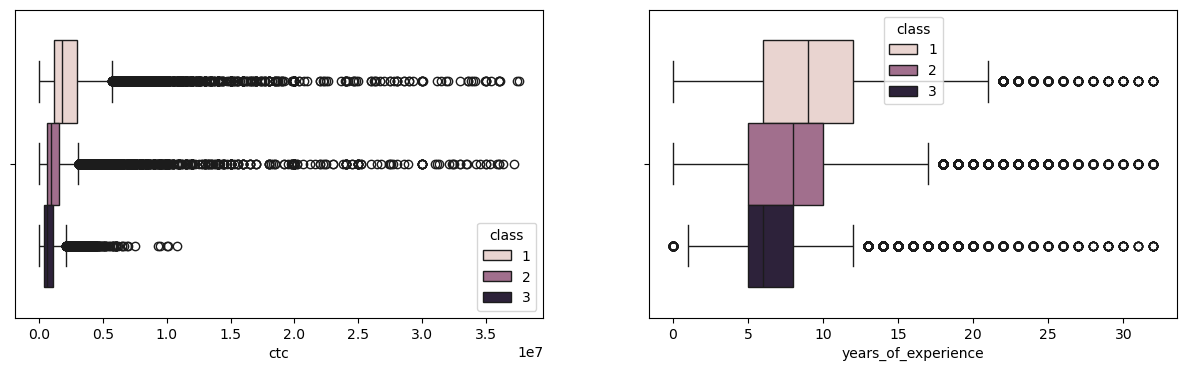

    class        job_position  count
0       1    backend engineer  10005
1       1  fullstack engineer   5115
2       1               other   3680
3       1   frontend engineer   1905
4       2    backend engineer  18165
5       2  fullstack engineer  12066
6       2               other   9046
7       2   frontend engineer   6051
8       3    backend engineer  18045
9       3  fullstack engineer   8921
10      3               other   6458
11      3   frontend engineer   3127


C:\Users\dz31jl\AppData\Local\Temp\ipykernel_4344\1484596224.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_positions = position_counts.groupby('class').apply(lambda x: x.nlargest(4, 'count')).reset_index(drop=True)


In [39]:
fig, axs = plt.subplots(1,2,figsize=(15,4))
sns.boxplot(ax=axs[0], data=df, x='ctc', hue='class')
sns.boxplot(ax=axs[1], data=df, x='years_of_experience', hue='class')
plt.show()
position_counts = df.groupby(['class', 'job_position']).size().reset_index(name='count')
top_positions = position_counts.groupby('class').apply(lambda x: x.nlargest(4, 'count')).reset_index(drop=True)
print(top_positions)

### Insight
- The mean CTC of class 1 > 2 > 3
- The mean years of experience of class 1 > 2 > 3
- The top 4 position of all the class are backend engineer, fullstack engineer, other and frontend engineer
- The **clustering** based on **class** is **able to differentiate** between **CTCs**, between **years of experience** but **not** **job position**

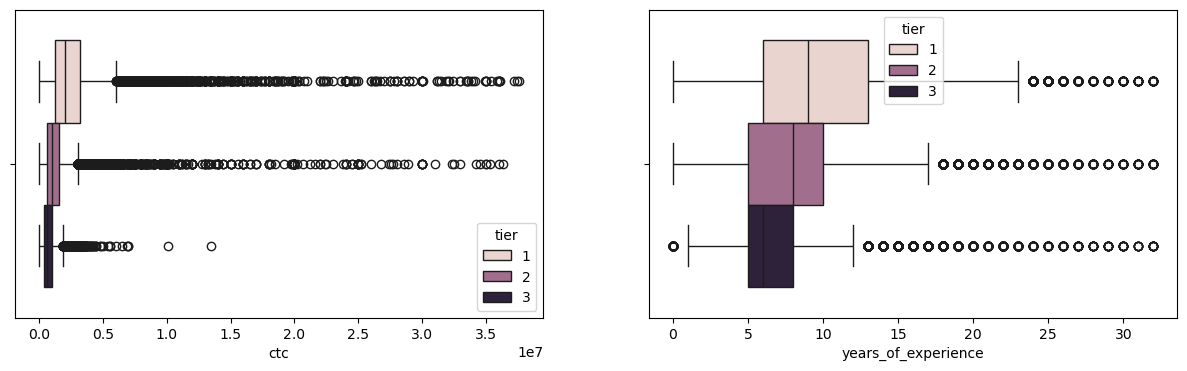

    tier            job_position  count
0      1        backend engineer  10498
1      1      fullstack engineer   5236
2      1  engineering leadership   3876
3      1                   other   3148
4      2        backend engineer  17343
5      2      fullstack engineer  10711
6      2                   other   6898
7      2       frontend engineer   4705
8      3        backend engineer  18374
9      3      fullstack engineer  10155
10     3                   other   9138
11     3       frontend engineer   4317


C:\Users\dz31jl\AppData\Local\Temp\ipykernel_4344\1903124631.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_positions = position_counts.groupby('tier').apply(lambda x: x.nlargest(4, 'count')).reset_index(drop=True)


In [40]:
fig, axs = plt.subplots(1,2,figsize=(15,4))
sns.boxplot(ax=axs[0], data=df, x='ctc', hue='tier')
sns.boxplot(ax=axs[1], data=df, x='years_of_experience', hue='tier')
plt.show()
position_counts = df.groupby(['tier', 'job_position']).size().reset_index(name='count')
top_positions = position_counts.groupby('tier').apply(lambda x: x.nlargest(4, 'count')).reset_index(drop=True)
print(top_positions)

### Insight
- The mean CTC of tier 1 > 2 > 3
- The mean years of experience of tier 1 > 2 > 3
- The top 4 position of tier 1 are backend engineer, fullstack engineer, engineering leadership and other while for all the other tiers are backend engineer, fullstack engineer, other and frontend engineer
- The **clustering** based on **tier** is **able to differentiate** between **CTCs**, between **years of experience** and **partially** between **job position**

In [41]:
temp_df = df[df['tier'] == 1].sort_values(by='ctc', ascending=False)[['company_hash', 'email_hash', 'ctc', 'job_position', 'years_of_experience']]
temp_df.head(10)

,company_hash,email_hash,ctc,job_position,years_of_experience
25231,onvnt onqttn,fb8410d957fcc2e98cc419e9354dbb3acea2309b0898e2...,37600000,other,7.0
1652,mxsmvoptnwgb,89e0bd3c55896b4b09bb31fa4a736dd6c6d9c3622049e0...,37400000,other,5.0
12240,stztojo,a6e0d878386ba7ef29d50a698c5037864d3eb2cf4de9cb...,37200000,other,4.0
57410,xmb,46dece7d152edae30f51b0ceab430cbc9681fdd0100e72...,36100000,database administrator,6.0
16073,oytrr xzaxv bvqptno rxbxnta,109ea0d2fea7028684f062eccdc53638489ff2e662ea86...,36000000,other,7.0
49297,zgn vuurxwvmrt,2c5f9aefb73259d3a6df5fe503c48587d8fc61eefacc8e...,36000000,other,9.0
65885,ofxssj,4d287c2dd88a8b8008781f9081581d3cd7a36d0cc88c8d...,36000000,other,9.0
66457,jvygg xzw,2e67d726c283087bbfaef033b250dc4ea395fa2b2d88cd...,36000000,backend engineer,15.0
112601,vuuajzvbxwo,4015c0491e4d40f288ee1e0d5d852997bff5535c03bed6...,35820000,other,9.0
8870,nvnv wgzohrnvzwj otqcxwto,914f81589b8d14a404eeee60384fc8e9260f1023ca6636...,35400000,other,8.0


In [42]:
temp_df['job_position'].value_counts()[:10]

job_position
backend engineer          10498
fullstack engineer         5236
engineering leadership     3876
other                      3148
frontend engineer          2061
data scientist             1637
android engineer           1011
qa engineer                 983
devops engineer             959
backend architect           736
Name: count, dtype: int64

### Insight
- Above are the top 10 employees earning more than most of the employees in the company
- The top employees belong to companies which provide software developer roles

In [43]:
df[df['tier'] == 3].sort_values(by='ctc', ascending=True).head(10)[['company_hash', 'email_hash', 'ctc']]

,company_hash,email_hash,ctc
107027,xzntqcxtfmxn,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,2
93403,xzntqcxtfmxn,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,6
90133,xzntqcxtfmxn,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,14
145643,xm,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,15
92572,hzxctqoxnj ge fvoyxzsngz,f7e5e788676100d7c4146740ada9e2f8974defc01f571d...,200
134689,nvnv wgzohrnvzwj otqcxwto,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,600
118958,zvz,9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...,600
79494,gjg,b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...,600
61224,vwwtznhqt,f0f2005505c707dbdd2c86ca1587c26f822a004e86a8ec...,1000
74368,zvz,4ea8ce7809d8c69147d243bad53d88d016a1151690b8b6...,1000


### Insight
- Above are the bottom 10 employees earning less than most of the employees in the company

In [44]:
temp_df = df[df['tier'] == 3].groupby(['company_hash']).agg({'ctc':'mean', 
                                                   'years_of_experience':'mean',
                                                   'ctc_rnk':'mean',
                                                   'designation':'mean',
                                                   'class':'mean'}).reset_index()
temp_df.describe()

,ctc,years_of_experience,ctc_rnk,designation,class
count,8.956000e+03,8956.000000,8956.000000,8956.000000,8956.000000
mean,7.456474e+05,7.430224,3.748434,2.303444,2.350800
std,5.655440e+05,3.170351,0.545134,0.383568,0.398012
min,1.500000e+01,0.000000,1.500000,1.666667,1.666667
25%,4.000000e+05,5.166667,4.000000,2.000000,2.000000
50%,6.250000e+05,7.000000,4.000000,2.000000,2.000000
75%,9.414534e+05,9.000000,4.000000,2.574495,2.666667
max,1.350000e+07,32.000000,4.000000,3.000000,3.000000


In [45]:
df[((df['class'] == 1) & (df['job_position'] == 'data scientist'))].sort_values(by='ctc', ascending=False).head(10)[['company_hash', 'email_hash', 'ctc']]

,company_hash,email_hash,ctc
136197,wxnx,f7b7c771ccdbbca7248002ba83f7a176baa974c2c7bb8f...,24200000
61817,bxwqgogen,599e489c815ba51967965c5d6adefd7a76a99ffaa129bd...,22500000
9238,sggsrt,3e290b892b73283b96293c53e4ce4dce2cc6a22399b95c...,22000000
57337,zvz,80f1ae60373f0ada3b75ce19eb585f8cf112de3cfa6ea7...,20000000
21231,xmb,b5dc6ad6d8d8f04312c34285a3c45fd9ffdc73ff3f1205...,20000000
90828,xmb xzaxv uqxcvnt rxbxnta,4beee431866cc493f7cc6689c2f00023683575a29e3174...,20000000
98676,nyghsynfgqpo,aa1d9bece779ff63a54bd6d32452e3f938a0afc6a52c6b...,20000000
149152,onvnt onqttn,9fdab215a86b0e2f18ee6c3d7653442cd7ad8b9cc4cf91...,18000000
103726,sgltp,24d6a653ce21e80d3f03eaab9b7600f4bbb0888cf7bccd...,12000000
21809,exwg,d1290b7e2d85c75902b863ccc3e4aafdd6e6eb07a10a00...,12000000


### Insight
- Above are the top 10 employees of data scientist role earning more than their peers

In [46]:
df[((df['class'] == 3) & (df['job_position'] == 'data scientist'))].sort_values(by='ctc', ascending=True).head(10)[['company_hash', 'email_hash', 'ctc']]

,company_hash,email_hash,ctc
92778,ovbohzs trtwnqgzxwo,3711220da929dcc0f6ca1f150b31ec7ac9302e8e59b118...,3500
8145,bxyhu wgbbhzxwvnxgz,690f6fdab1ab7514a6a9325ebd6cfe910dbf12d46b6fde...,4000
36359,cgavegzt oyvqta otqcxwto rxbxnta,c5335f1ab2b6b60e4c7bf52a9dd2f22b87e07208ecbb0e...,4000
10011,srgmvrtast xzntrrxstzwt ge nyxzso,8001bc017fbe95541d23f5780c3edb988b7d9b2225e39e...,4000
48692,onvnt onqttn,210022464f7fc73ab22c22b9b2fcb8dc4fd8e3fe69ac1a...,6000
40873,onhatzn,bd9c04a574090e05b366a81cdb2f3f565d0c60fa8b1647...,6000
108429,ovbohzs trtwnqg btwyvzxwo,e374eea75640881206a21894f69190138c2c0535277dc1...,7000
8770,nvnv wgzohrnvzwj otqcxwto,3175d03fd4618eb293d6f5a1d13d42a0c79f68e9acaaa3...,7500
20257,vqxosrgmvr,3675f79c7e05de96ccf189c818b84b487cb1aa3f6b80e8...,8800
25625,sggsrt,fb64af615420e06d46a1965f59068b34460fb3cbe70541...,10000


### Insight
- Above are the bottom 10 employees of data scientist role earning less than their peers

In [47]:
df[(df['tier'] == 1) & ((df['years_of_experience'] >= 5) & (df['years_of_experience'] <= 7))].sort_values(by='ctc', ascending=False).head(10)[['company_hash', 'email_hash', 'ctc']]

,company_hash,email_hash,ctc
25231,onvnt onqttn,fb8410d957fcc2e98cc419e9354dbb3acea2309b0898e2...,37600000
1652,mxsmvoptnwgb,89e0bd3c55896b4b09bb31fa4a736dd6c6d9c3622049e0...,37400000
57410,xmb,46dece7d152edae30f51b0ceab430cbc9681fdd0100e72...,36100000
16073,oytrr xzaxv bvqptno rxbxnta,109ea0d2fea7028684f062eccdc53638489ff2e662ea86...,36000000
70443,stzuvwn,351256c3e18d5d9520baa0f6d7060799d2d81b2cc5c44a...,35000000
22238,vwwtznhqt,fe6af782581bf996a3daacc23387526b8f65435d3c7bd4...,34890000
103184,vnnqv,596b127f7d32653e454c6f42bf74f97af8f8e71d32d352...,34000000
11165,ihtoo wgqu,fce813324a073acc850322b38f11b48e3771c6558bc21e...,33500000
29263,xzaxsg vxqrxzt,14df647edb4209bf283db88e2fea7d52f2e321481dcc4e...,33400000
33201,yvuuxton bxzao ntwyzgrgsxto,59216d0595d84ec308c8ab6107a8e071af0aaa11bff208...,33000000


### Insight
- Above are the top 10 employees with 5,6 or 7 years of experience earning more than most of the employees in the company

In [48]:
df.groupby(['company_hash']).agg({'ctc':'max'}).sort_values(by='ctc', ascending=False).head(10)

,ctc
company_hash,
onvnt onqttn,37600000
mxsmvoptnwgb,37400000
stztojo,37200000
bgngktz ehtr ojontb,36360000
xmb,36100000
srgmvr ogenfvqt,36000000
jvygg xzw,36000000
zgn vuurxwvmrt,36000000
ofxssj,36000000


### Insight
- Above are the top 10 companies based on their CTC

In [49]:
temp_df = df[['company_hash', 'job_position', 'ctc']].groupby('company_hash').apply(lambda x: x.nlargest(2, 'ctc')).reset_index(drop=True).sort_values(by='ctc', ascending=False)
temp_df['job_position'].value_counts()

C:\Users\dz31jl\AppData\Local\Temp\ipykernel_4344\1812531026.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp_df = df[['company_hash', 'job_position', 'ctc']].groupby('company_hash').apply(lambda x: x.nlargest(2, 'ctc')).reset_index(drop=True).sort_values(by='ctc', ascending=False)


job_position
backend engineer           9470
fullstack engineer         7214
other                      4869
frontend engineer          3610
engineering leadership     3183
                           ... 
software qa engineer          1
credit risk                   1
assistant manager             1
web  ui designer              1
fullstack web developer       1
Name: count, Length: 255, dtype: int64

### Insight
- **backend engineer** and **fullstack engineer** are the top 2 job positions in most of the company with high CTC

## 5.5. Data preparation for modelling

In [50]:
X = df.drop(columns=['company_hash', 'email_hash', 'orgyear', 'job_position', 'ctc_updated_year'])

In [51]:
X.head()

,ctc,years_of_experience,years_since_increment,ctc_rnk,designation,class,tier
0,1100000,7.0,3.0,3,2,1,2
1,449999,5.0,4.0,4,3,3,3
2,2000000,8.0,3.0,2,2,2,2
3,700000,6.0,4.0,4,3,3,3
4,1400000,6.0,4.0,1,2,1,1


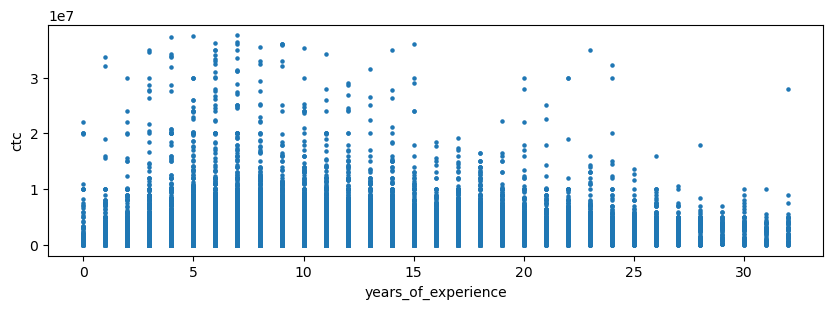

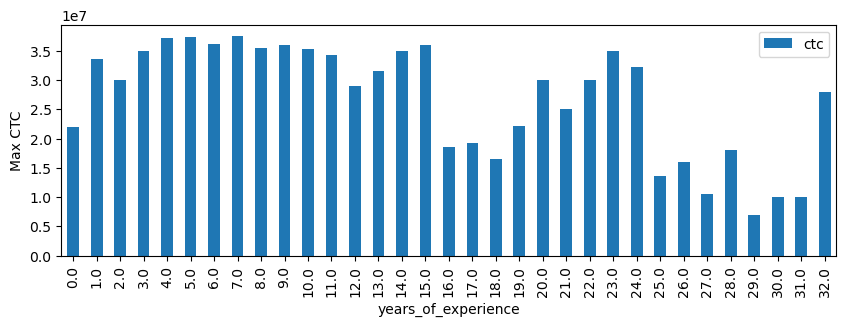

In [52]:
X.plot.scatter(x='years_of_experience', y='ctc', s=5, figsize=(10,3))
plt.show()
X.groupby(['years_of_experience']).agg({'ctc':'max'}).plot(kind='bar', figsize=(10,3))
plt.ylabel('Max CTC')
plt.show()

**Scale the data**

In [53]:
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

In [54]:
X_scaled.head()

,ctc,years_of_experience,years_since_increment,ctc_rnk,designation,class,tier
0,-0.166324,-0.252893,-0.351471,-0.018477,-0.176573,-1.625672,-0.234119
1,-0.570941,-0.723569,0.408135,0.834988,1.252976,1.250485,1.082146
2,0.393913,-0.017555,-0.351471,-0.871942,-0.176573,-0.187593,-0.234119
3,-0.415318,-0.488231,0.408135,0.834988,1.252976,1.250485,1.082146
4,0.020422,-0.488231,0.408135,-1.725407,-0.176573,-1.625672,-1.550384


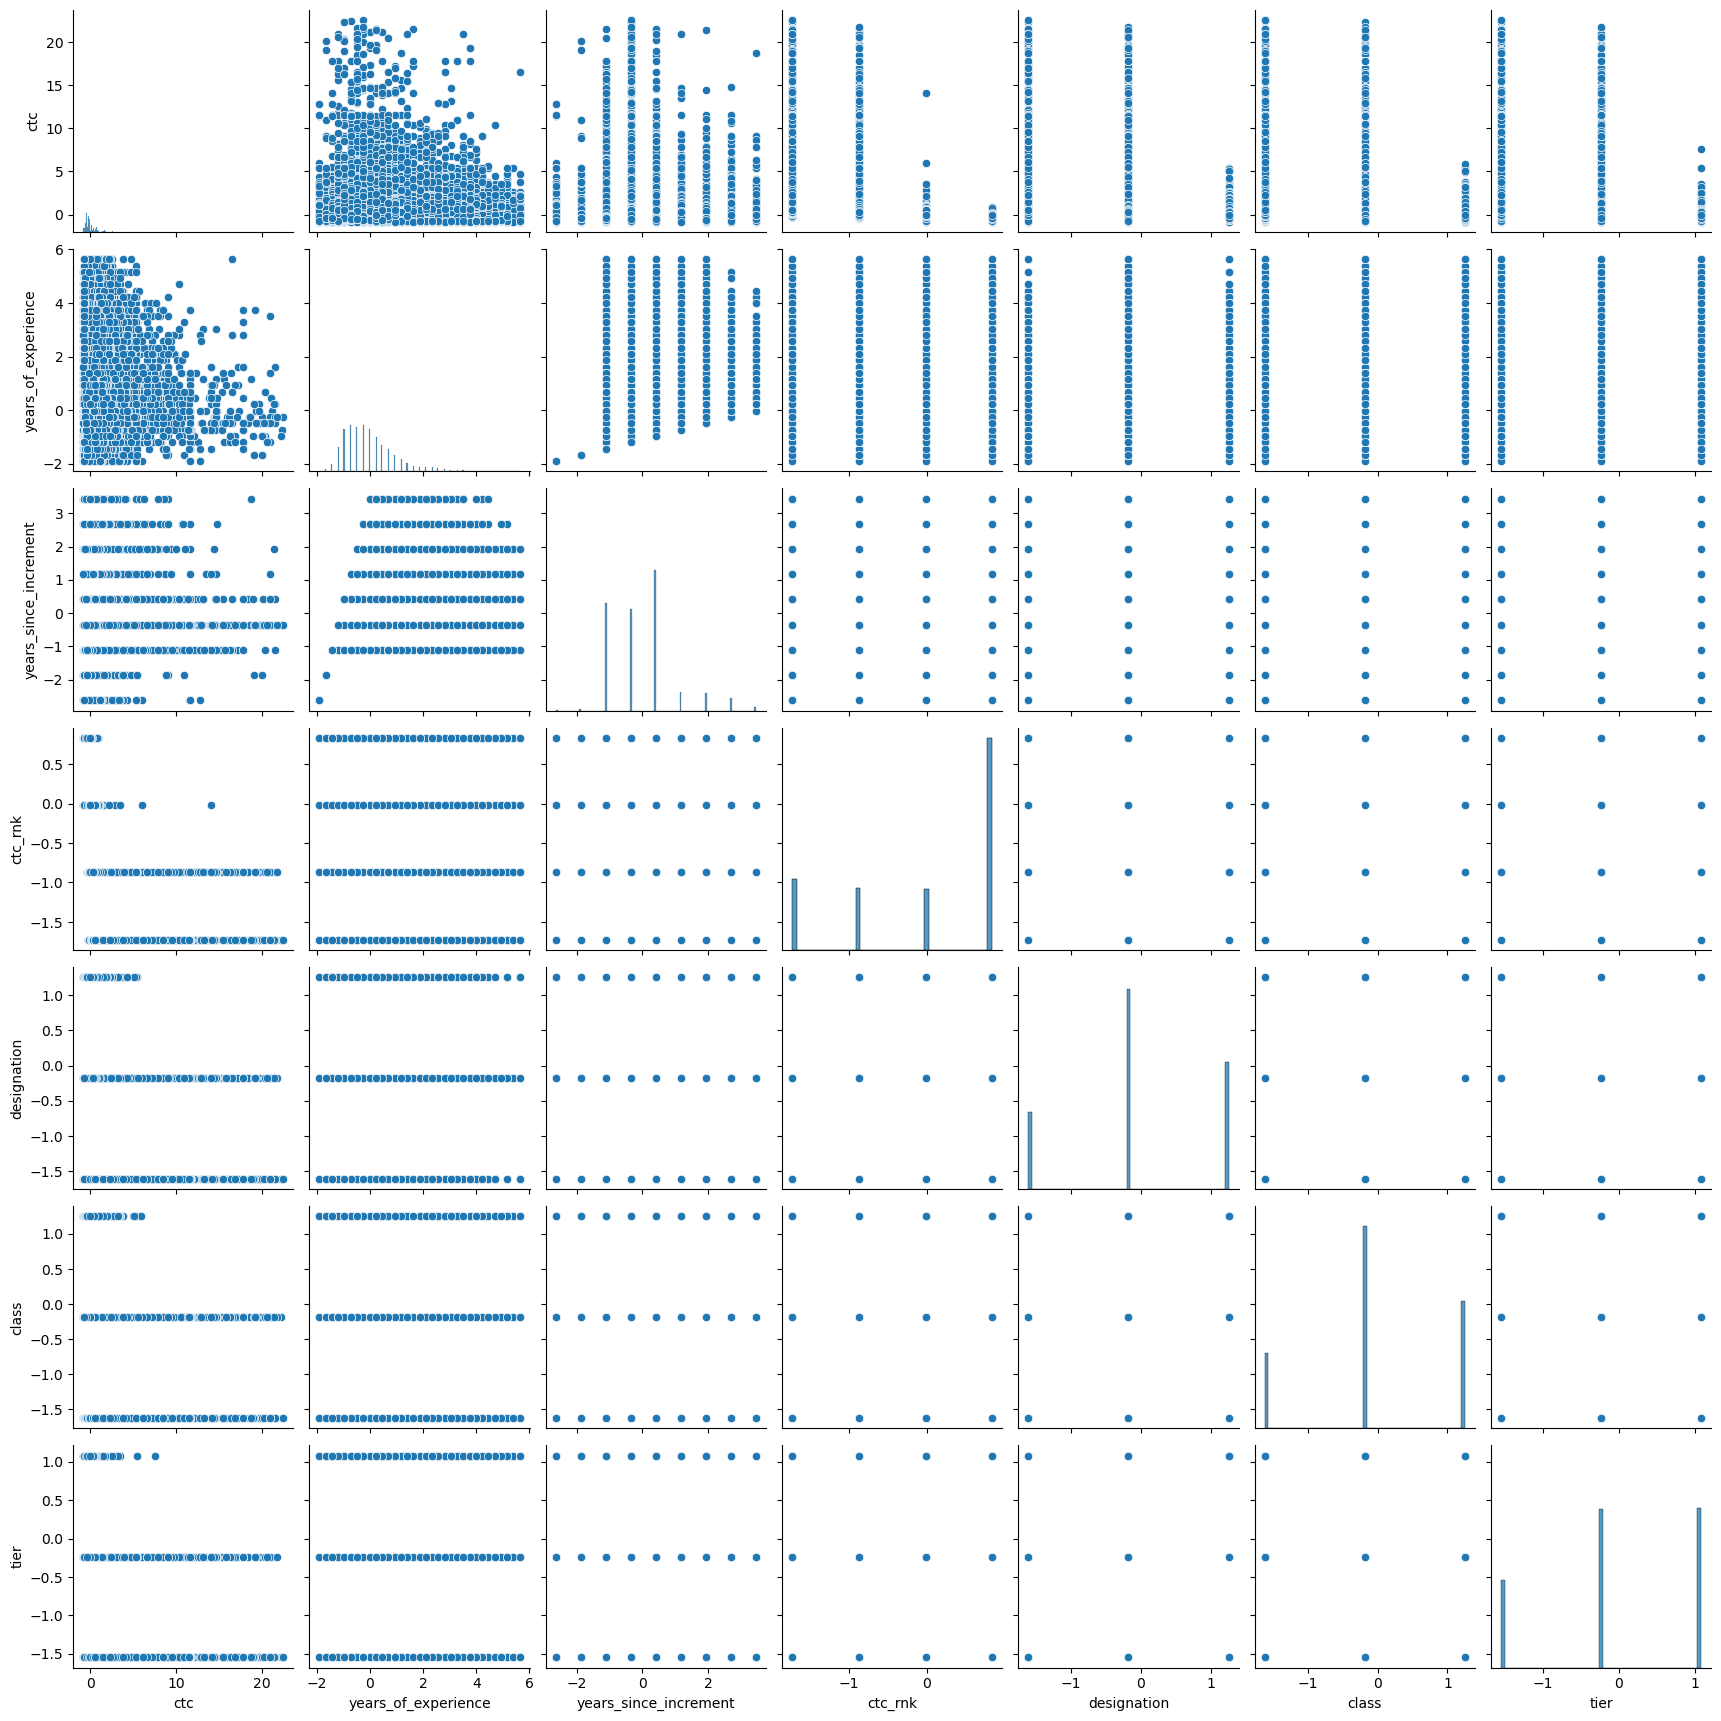

In [55]:
sns.pairplot(X_scaled)
plt.show()

# 6. Model building

## 6.1. Check Clustering Tendency

In [56]:
# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):
    
    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures    
    
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))     
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]   
    
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1] 
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [57]:
l = [] #list to hold values for each call
for i in range(5):
    H=hopkins_statistic(X_scaled)
    l.append(H)
#print average value:
np.mean(l)

0.9875647762150388

**As per Hopkins statistics, with the value of ~0.98, the dataset exhibits very good clustering tendency**

## 6.2. Selecting Optimal Number of Clusters

### 6.2.1. Using the KMeans inertia and Elbow Method

In [58]:
min_num_of_clusters = 2
max_num_of_clusters = 15
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_scaled)
                for k in range(min_num_of_clusters, max_num_of_clusters)]

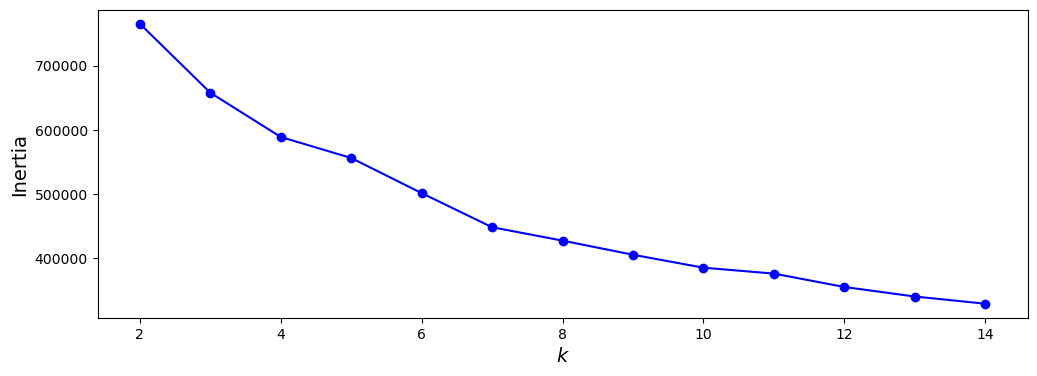

In [59]:
inertias = [model.inertia_ for model in kmeans_per_k]
#print(inertias)
plt.figure(figsize=(12, 4))
plt.plot(range(min_num_of_clusters, max_num_of_clusters, 1), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

**As per the above WCSS, an elbow is created at value 4 and also at 7**

### 6.2.2. Using the Hierarchical Clustering Dendrogram

In [60]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [62]:
X_scaled_sample = X_scaled.sample(10000)
X_sample = X.iloc[X_scaled_sample.index]
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled_sample)

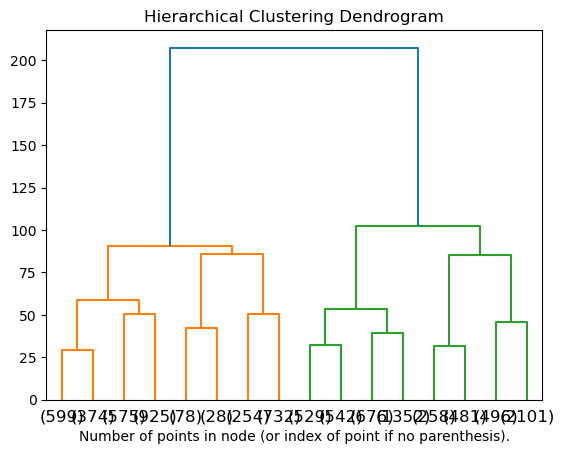

In [63]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

**As per the dendrogram plot, number of clusters could be 4**

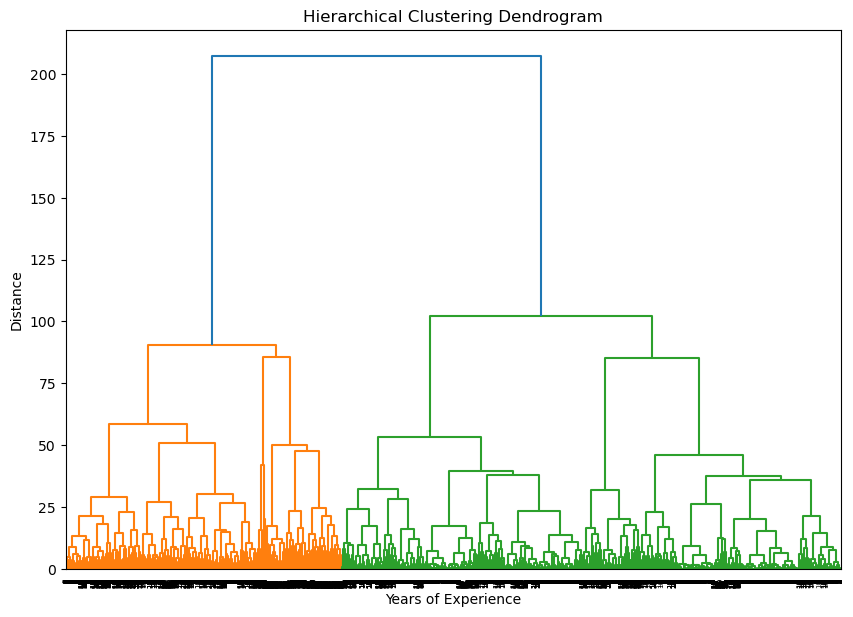

In [64]:
linkage_matrix = sch.linkage(X_scaled_sample, method='ward')
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix, labels=X_sample['years_of_experience'].values.astype(int))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Years of Experience')
plt.ylabel('Distance')
plt.show()

### Insight
- From the above we can see a clear pattern that the low number of years of experience are grouped together on the extreme left, medium number of years of experience are grouped together in the middle and high number of years of experience are grouped together at the extreme right

## 6.3. K-means Clustering using the optimal number of clusters

In [65]:
final_num_clusters = 4
kM = KMeans(n_clusters=final_num_clusters, random_state=42)
y_pred = kM.fit_predict(X_scaled)
clusters = pd.DataFrame(X, columns=X.columns)
clusters['label'] = kM.labels_

In [66]:
clusters.head()

,ctc,years_of_experience,years_since_increment,ctc_rnk,designation,class,tier,label
0,1100000,7.0,3.0,3,2,1,2,1
1,449999,5.0,4.0,4,3,3,3,2
2,2000000,8.0,3.0,2,2,2,2,1
3,700000,6.0,4.0,4,3,3,3,2
4,1400000,6.0,4.0,1,2,1,1,3


### 6.3.1 Visualizing clusters using PCA

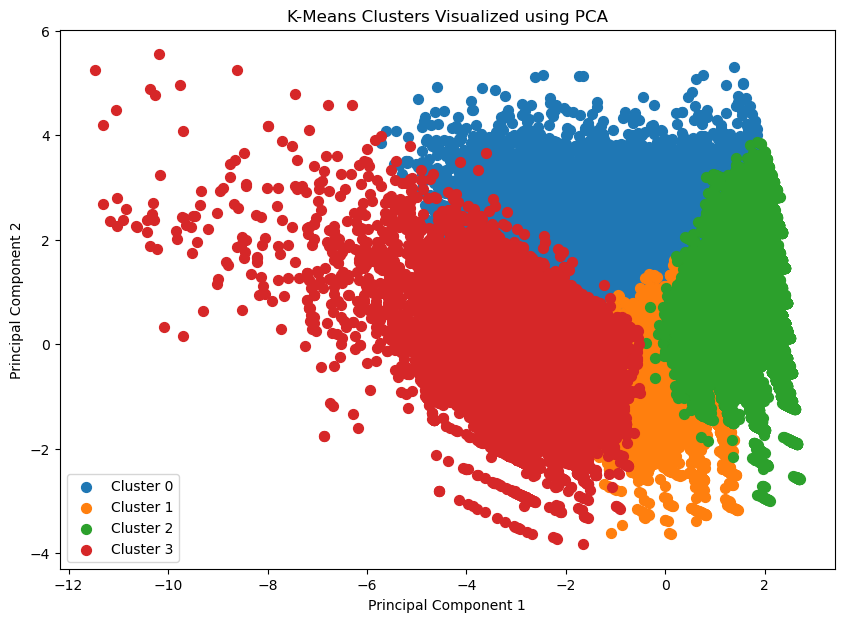

In [67]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = kM.labels_
# Plot the clusters
plt.figure(figsize=(10, 7))
for cluster in range(final_num_clusters):
    clustered_data = df_pca[df_pca['cluster'] == cluster]
    plt.scatter(clustered_data['PC1'], clustered_data['PC2'], label=f'Cluster {cluster}', s=50)

plt.title('K-Means Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### 6.3.2 Visualizing clusters using TSNE

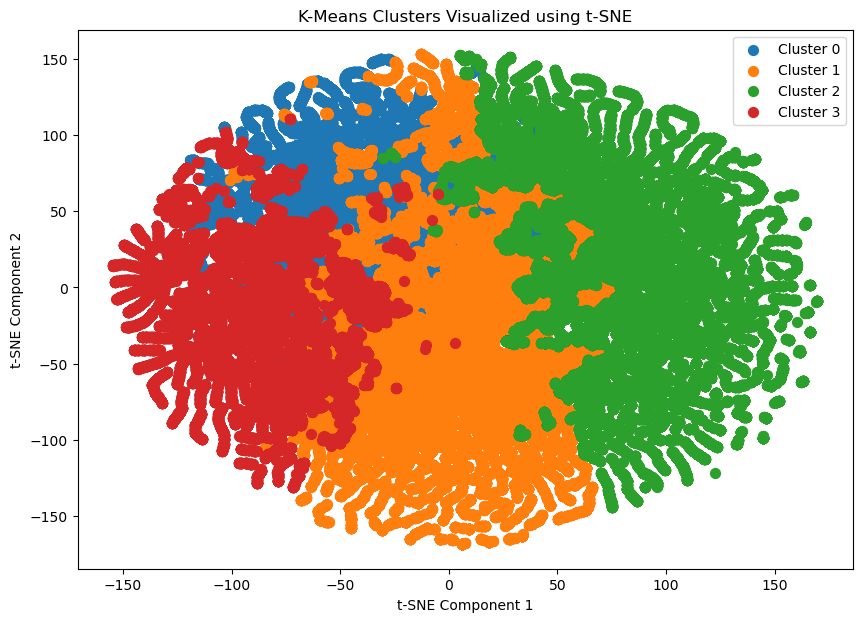

In [68]:
# Perform t-SNE to reduce to 2 components
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(X_scaled)

# Create a DataFrame with the t-SNE components and cluster labels
df_tsne = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
df_tsne['cluster'] = kM.labels_

# Plot the clusters
plt.figure(figsize=(10, 7))
for cluster in range(final_num_clusters):
    clustered_data = df_tsne[df_tsne['cluster'] == cluster]
    plt.scatter(clustered_data['TSNE1'], clustered_data['TSNE2'], label=f'Cluster {cluster}', s=50)

plt.title('K-Means Clusters Visualized using t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

### 6.3.3 Visualizing clusters using UMAP

C:\ProgramData\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\ProgramData\anaconda3\Lib\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


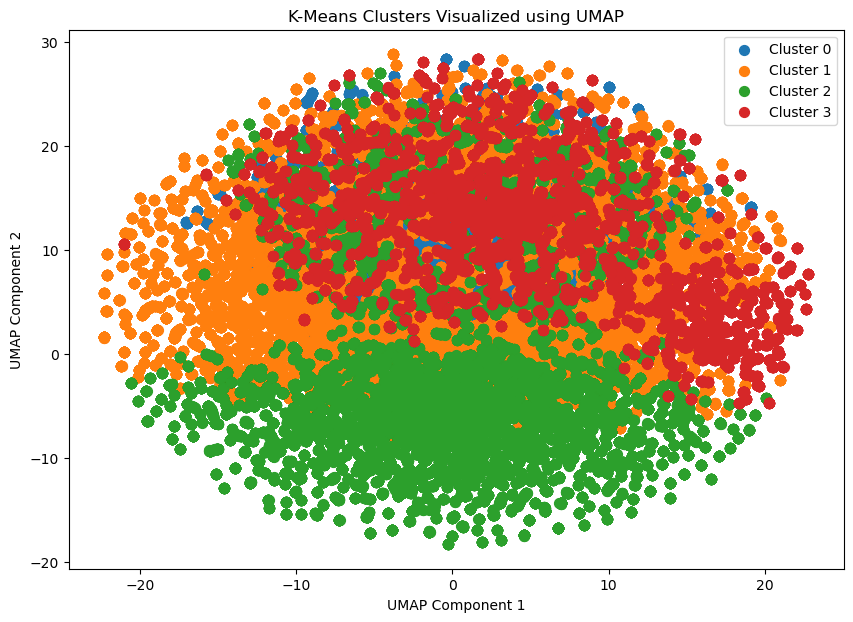

In [69]:
# Perform UMAP to reduce to 2 components
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_components = umap_reducer.fit_transform(X_scaled)

# Create a DataFrame with the UMAP components and cluster labels
df_umap = pd.DataFrame(data=umap_components, columns=['UMAP1', 'UMAP2'])
df_umap['cluster'] = kM.labels_

# Plot the clusters
plt.figure(figsize=(10, 7))
for cluster in range(final_num_clusters):
    clustered_data = df_umap[df_umap['cluster'] == cluster]
    plt.scatter(clustered_data['UMAP1'], clustered_data['UMAP2'], label=f'Cluster {cluster}', s=50)

plt.title('K-Means Clusters Visualized using UMAP')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.show()

**PCA does a better job at visualizing the clusters in my dataset**

In [70]:
clusters.head()

,ctc,years_of_experience,years_since_increment,ctc_rnk,designation,class,tier,label
0,1100000,7.0,3.0,3,2,1,2,1
1,449999,5.0,4.0,4,3,3,3,2
2,2000000,8.0,3.0,2,2,2,2,1
3,700000,6.0,4.0,4,3,3,3,2
4,1400000,6.0,4.0,1,2,1,1,3


In [71]:
unique_labels = clusters['label'].nunique()
colors = sns.color_palette("tab10")[:unique_labels]

In [72]:
clusters.groupby(['label']).agg({'ctc':'mean', 
                                 'years_of_experience':'mean', 
                                 'years_since_increment':'mean', 
                                 'ctc_rnk':pd.Series.mode,
                                 'designation':pd.Series.mode,
                                 'class':pd.Series.mode,
                                 'tier':pd.Series.mode,}).reset_index()

,label,ctc,years_of_experience,years_since_increment,ctc_rnk,designation,class,tier
0,0,1.990055e+06,14.549212,4.590624,2,2,2,2
1,1,8.236399e+05,6.709576,3.164938,4,2,2,2
2,2,7.241013e+05,6.577885,3.492236,4,3,3,3
3,3,2.887250e+06,8.099743,3.099837,1,1,1,1


label
0    0.144530
1    0.338950
2    0.319407
3    0.197113
Name: count, dtype: float64


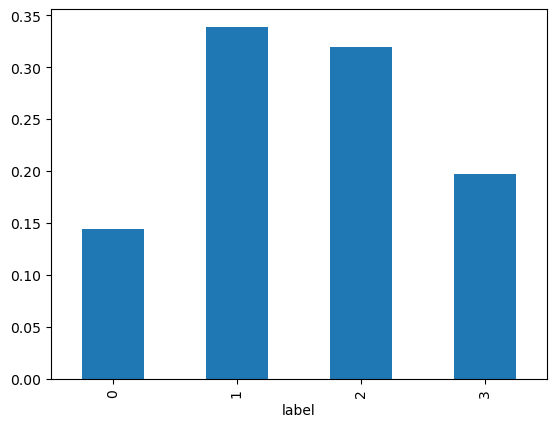

In [73]:
temp_df = clusters.groupby(['label'])['label'].value_counts()/clusters.shape[0]
print(temp_df)
temp_df.plot(kind='bar')
plt.show()

 # 7. Insights

- **4 clusters** were created based on the elbow method and dendrogram chart
- **Cluster 3** has the highest mean CTC, highest CTC rank, highest designation, highest class and highest tier. It also has the second highest years of experience
- **Cluster 2** has lowest mean CTC, lowest CTC rank, lowest designation, lowest class and lowest tier. It also has the lowest years of experience
- **Cluster 1** is similar to Cluster 2 with slighly better CTC, designation, class and tier
- **Cluster 0** has good CTC, CTC rank, designation, class and tier. It has the highest years of experience
- From these observation, it looks like **Cluster 0** comprises of **highly experienced** people with **good CTC**, **Cluster 1** and **Cluster 2** comprises of **entry level to mid-senior** level people with **average CTC** and **Cluster 3** comprise of **senior** level people with **great CTC**
- **Maximum** learners belong to **Cluster 1** followed by Cluster 2.

 # 8. Recommendation

- Scaler has a lot of learners belonging to junior/mid-senior roles and hence should design more courses which will help these learners enhance their skills and move up the career ladder.
- Scaler can attract more people to their learning platform by running ads of how Software Development and Data Analyst/Scientist roles get high salary
- Scaler should make efforts to pull in more people from Academia(both students and teachers) to increase their learners base as well as make the students industry ready and employable with high salaries.
- The clustering algorithm can be bettered by asking the learners to mention their job position more precisely and specifically instead of just mentioning "Others"
- Scaler should also ask the learners to mention their domain of study/work which again will be helpful in improving the clustering algorithm

 # 9. Questionnaire

#### 1. What percentage of users fall into the largest cluster?
**Ans:** Around 34% of learners fall into the largest cluster, 1
#### 2. Comment on the characteristics that differentiate the primary clusters from each other.
**Ans:** CTC, Years of experience, CTC rank, Designation, Class and Tier are the most important characteristics that differentiate the clusters
#### 3. Is it always true that with an increase in years of experience, the CTC increases? Provide a case where this isn't true.
**Ans:** No, it is not true that CTC increases with increase in experience. The maximum CTC belongs to a learner with 7 years of experience and the minimum CTC belongs to a 29 year experienced learner
#### 4. Name a job position that is commonly considered entry-level but has a few learners with unusually high CTCs in the dataset.
**Ans:** Data Analysts is usually considered a entry-level job and there is a learner with Data Analyst job position with a CTC higher than that of a learner with engineering leadership job position
#### 5. What is the average CTC of learners across different job positions?
**Ans:** Average CTC across different job positions is 1268701.92
#### 6. For a given company, how does the average CTC of a Data Scientist compare with other roles?
**Ans:** There are around 900+ companies in which more than 50% of the times the avergae CTC of a Data Scientist is greater than that of other roles
#### 7. Discuss the distribution of learners based on the Tier flag:
- **7.1. Which companies dominate in Tier 1 and why might this be the case?**
- **Ans:** The companies which offer Software Developer roles are the companies which dominate Tier 1 as Software Developers are in high demand due to the exponential growth of AI
- **7.2. Are there any notable patterns or insights when comparing learners from Tier 3 across different companies**
- **Ans** The learners have a mean of 7 years of experience with CTC being on the lower end.
#### 8. After performing unsupervised clustering:
- **8.1. How many clusters have been identified using the Elbow method?**
- **Ans:** The elbow method gave two elbows, one at 4 and another at 7
- **8.2. Do the clusters formed align or differ significantly from the manual clustering efforts? If so, in what way**
- **Ans:** The clusters formed are slightly better than the manual clustering. The manual clustering was able to differentiate between CTCs and years of experience clearly and job_position partially. The clusters formed due to kMeans are able to differentaie CTC, years of experience and job position(encoded in **class** column) clearly.
#### 9. From the Hierarchical Clustering results:
- **9.1. Are there any clear hierarchies or patterns formed that could suggest the different levels of seniority or roles within a company?**
- **Ans:** Yes
- **9.2 How does the dendrogram representation correlate with the 'Years of Experience' feature?**
- **Ans:** We can see a clear pattern that the low number of years of experience are grouped together on the extreme left of the dendrogram, medium number of years of experience are grouped together in the middle and high number of years of experience are grouped together at the extreme right?.s.